In [35]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import shape
from bokeh.io import output_file, show,output_notebook
from bokeh.models import ColumnDataSource,ColorBar,HoverTool
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
from bokeh.palettes import RdBu4

Install necessary libraries

In [2]:
DenTracts=gpd.read_file('denver-colorado-census-tracts-2010.shp')
DenTracts.head()

,TRACT_NAME,GEOID_TRAC,GEOID_NUM,POPULATION,HISPANIC_2,WHITE_2010,BLACK_2010,NATIVE_AM_,ASIAN_2010,HAWPACIS_2,...,RENTED_A_1,RENTED_A_2,RENTED_A_3,RENTED_A_4,RENTED_A_5,RENTED_A_6,RENTED_A_7,RENTED_A_8,SHAPE_Leng,geometry
0,Census Tract 19.02,08031001902,8.031002e+09,705.0,62.0,555.0,27.0,5.0,29.0,2.0,...,6.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.055663,"POLYGON ((-104.99859 39.74024, -104.99857 39.7..."
1,Census Tract 14.02,08031001402,8.031001e+09,4070.0,2690.0,996.0,109.0,42.0,200.0,0.0,...,144.0,115.0,106.0,47.0,43.0,56.0,28.0,7.0,0.063387,"POLYGON ((-105.00901 39.68948, -105.00876 39.6..."
2,Census Tract 11.01,08031001101,8.031001e+09,2601.0,1779.0,619.0,111.0,37.0,17.0,0.0,...,133.0,87.0,83.0,37.0,20.0,31.0,22.0,4.0,0.040510,"POLYGON ((-105.00080 39.77656, -105.00057 39.7..."
3,Census Tract 5.02,08031000502,8.031001e+09,5424.0,1951.0,2960.0,108.0,74.0,227.0,1.0,...,321.0,188.0,133.0,85.0,80.0,160.0,173.0,99.0,0.052565,"POLYGON ((-105.03367 39.75850, -105.03343 39.7..."
4,Census Tract 7.01,08031000701,8.031001e+09,4166.0,2205.0,1654.0,110.0,76.0,48.0,5.0,...,237.0,186.0,172.0,63.0,79.0,214.0,145.0,60.0,0.049221,"POLYGON ((-105.03931 39.74395, -105.03931 39.7..."


Read the Denver census tracts shapefile

In [3]:
df=pd.read_csv('crime.csv',encoding="latin-1")
DenCrime=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.geo_lon,df.geo_lat), crs="EPSG: 4326")
DenCrime.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
0,2.022688e+08,2.020000e+14,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50,NaN,2/10/2022 3:16,1107 N SANTA FE DR,...,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1,POINT (-104.99891 39.73396)
1,2.021388e+09,2.020000e+15,2999,0,criminal-mischief-other,public-disorder,7/7/2021 21:02,NaN,7/8/2021 0:55,815 16TH ST,...,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1,POINT (-104.99334 39.74625)
2,2.020641e+09,2.020000e+15,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30,NaN,10/29/2020 4:31,4745 N FEDERAL BLVD,...,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1,POINT (-105.02552 39.78289)
3,2.018612e+09,2.020000e+15,2999,0,criminal-mischief-other,public-disorder,9/6/2018 17:00,9/6/2018 23:00,9/7/2018 9:58,65 S FEDERAL BLVD,...,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1,POINT (-105.02533 39.71536)
4,2.020294e+09,2.020000e+15,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00,5/8/2020 18:30,5/13/2020 10:00,12295 E ALBROOK DR,...,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1,POINT (-104.84507 39.78308)


Read crime data and set geometry

In [4]:
DenCrime.sort_values('geo_lat', ascending=False)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
3015,2.022601e+10,2.020000e+16,2999,0,criminal-mischief-other,public-disorder,4/7/2022 18:00,4/8/2022 7:00,4/11/2022 16:44,11345 N TRUSSVILLE ST,...,1754122.0,-104.670622,39.900961,7,759,dia,1,0,1,POINT (-104.67062 39.90096)
241423,2.021804e+10,2.020000e+16,2399,0,theft-other,larceny,10/1/2021 7:00,10/6/2021 13:00,10/7/2021 11:14,11345 N TRUSSVILLE ST,...,1754122.0,-104.670622,39.900961,7,759,dia,1,0,1,POINT (-104.67062 39.90096)
272467,2.022601e+10,2.020000e+16,2404,0,theft-of-motor-vehicle,auto-theft,4/7/2022 19:00,4/18/2022 6:00,4/18/2022 12:01,11345 N TRUSSVILLE ST,...,1754122.0,-104.670618,39.900961,7,759,dia,1,0,1,POINT (-104.67062 39.90096)
90166,2.022801e+10,2.020000e+16,5707,0,criminal-trespassing,all-other-crimes,2/20/2022 12:45,2/20/2022 17:00,2/20/2022 18:52,10752 N GUN CLUB RD,...,1752023.0,-104.714616,39.895500,7,759,dia,1,0,1,POINT (-104.71462 39.89550)
87046,2.022803e+10,2.020000e+16,5707,0,criminal-trespassing,all-other-crimes,7/30/2022 10:48,NaN,7/30/2022 12:42,26200 E 109TH AVE,...,1751935.0,-104.680008,39.895023,7,759,dia,1,0,1,POINT (-104.68001 39.89502)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386710,2.023532e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,10/2/2023 19:15,10/2/2023 19:21,10/2/2023 19:21,NaN,...,NaN,NaN,NaN,6,621,five-points,1,0,1,POINT EMPTY
386711,2.023510e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,9/21/2023 10:00,9/21/2023 11:00,9/21/2023 23:09,NaN,...,NaN,NaN,NaN,3,322,washington-virginia-vale,1,0,1,POINT EMPTY
386714,2.023534e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 16:07,NaN,10/3/2023 17:37,NaN,...,NaN,NaN,NaN,4,423,harvey-park-south,1,0,1,POINT EMPTY
386715,2.023533e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 8:43,NaN,10/3/2023 11:10,NaN,...,NaN,NaN,NaN,2,211,whittier,1,0,1,POINT EMPTY


Sort longitude by descending, there are several rows with incorrect lat/long that will have to be removed

In [5]:
DenCrime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   incident_id             386865 non-null  float64 
 1   offense_id              386865 non-null  float64 
 2   offense_code            386865 non-null  int64   
 3   offense_code_extension  386865 non-null  int64   
 4   offense_type_id         386865 non-null  object  
 5   offense_category_id     386865 non-null  object  
 6   first_occurrence_date   386865 non-null  object  
 7   last_occurrence_date    211309 non-null  object  
 8   reported_date           386865 non-null  object  
 9   incident_address        371362 non-null  object  
 10  geo_x                   371362 non-null  float64 
 11  geo_y                   371362 non-null  float64 
 12  geo_lon                 371096 non-null  float64 
 13  geo_lat                 371096 non-null  float64 
 

.info() to get column integer numbers

In [6]:
count=0
for i in range(len(DenCrime)):
  if DenCrime.iloc[i,13]<1:
    count=count+1
count

39

A for loop that counts how many latitude values are less than 1 and need to be removed in order to get the correct range for the removal loop in the next block

In [7]:
for i in range(len(DenCrime)-count):
  if DenCrime.iloc[i,13]<1:
    DenCrime=DenCrime.drop([i]).reset_index(drop=True)
DenCrime.sort_values('geo_lon', ascending=False)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
82191,2.018806e+10,2.020000e+16,5707,0,criminal-trespassing,all-other-crimes,11/18/2018 23:37,NaN,11/19/2018 0:21,E 88TH AVE / N HARDWRICK ST,...,1737792.0,-104.639230,39.855907,7,759,dia,1,0,1,POINT (-104.63923 39.85591)
86190,2.022803e+10,2.020000e+16,5707,0,criminal-trespassing,all-other-crimes,7/29/2022 12:08,NaN,7/29/2022 14:09,E 88TH AVE / N HARDWRICK ST,...,1737792.0,-104.639230,39.855907,7,759,dia,1,0,1,POINT (-104.63923 39.85591)
299446,2.018806e+10,2.020000e+16,2404,0,theft-of-motor-vehicle,auto-theft,11/18/2018 23:37,NaN,11/19/2018 0:21,E 88TH AVE / N HARDWRICK ST,...,1737792.0,-104.639230,39.855907,7,759,dia,1,0,1,POINT (-104.63923 39.85591)
354450,2.023803e+10,2.020000e+16,1313,0,assault-simple,other-crimes-against-persons,5/13/2023 5:06,NaN,5/13/2023 6:17,8300 BLOCK N VANDRIVER ST,...,1734962.0,-104.663517,39.848313,7,759,dia,1,0,1,POINT (-104.66352 39.84831)
354374,2.023803e+10,2.020000e+16,5312,0,disturbing-the-peace,public-disorder,5/13/2023 5:06,NaN,5/13/2023 6:17,8300 BLOCK N VANDRIVER ST,...,1734962.0,-104.663517,39.848313,7,759,dia,1,0,1,POINT (-104.66352 39.84831)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386672,2.023532e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,10/2/2023 19:15,10/2/2023 19:21,10/2/2023 19:21,NaN,...,NaN,NaN,NaN,6,621,five-points,1,0,1,POINT EMPTY
386673,2.023510e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,9/21/2023 10:00,9/21/2023 11:00,9/21/2023 23:09,NaN,...,NaN,NaN,NaN,3,322,washington-virginia-vale,1,0,1,POINT EMPTY
386676,2.023534e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 16:07,NaN,10/3/2023 17:37,NaN,...,NaN,NaN,NaN,4,423,harvey-park-south,1,0,1,POINT EMPTY
386677,2.023533e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 8:43,NaN,10/3/2023 11:10,NaN,...,NaN,NaN,NaN,2,211,whittier,1,0,1,POINT EMPTY


Removed all rows with <1 for the latitude

In [8]:
DenCrime.sort_values('geo_lon', ascending=True)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
354111,2.023246e+09,2.020000e+15,2203,0,burglary-business-by-force,burglary,5/9/2023 17:00,5/10/2023 7:30,5/11/2023 10:40,2819 W 53RD AVE,...,111.0,-115.464100,34.638535,1,111,NaN,1,0,1,POINT (-115.46410 34.63854)
81362,2.018287e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,4/29/2018 2:29,NaN,4/29/2018 2:29,26771 GENESEE LN,...,1687615.0,-105.321797,39.721171,U,999,NaN,1,0,1,POINT (-105.32180 39.72117)
84560,2.018445e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,7/2/2018 17:30,NaN,7/2/2018 17:30,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
87763,2.018447e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,7/3/2018 17:51,NaN,7/3/2018 17:51,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
87757,2.022364e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,7/17/2022 17:45,NaN,7/17/2022 17:45,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386672,2.023532e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,10/2/2023 19:15,10/2/2023 19:21,10/2/2023 19:21,NaN,...,NaN,NaN,NaN,6,621,five-points,1,0,1,POINT EMPTY
386673,2.023510e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,9/21/2023 10:00,9/21/2023 11:00,9/21/2023 23:09,NaN,...,NaN,NaN,NaN,3,322,washington-virginia-vale,1,0,1,POINT EMPTY
386676,2.023534e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 16:07,NaN,10/3/2023 17:37,NaN,...,NaN,NaN,NaN,4,423,harvey-park-south,1,0,1,POINT EMPTY
386677,2.023533e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 8:43,NaN,10/3/2023 11:10,NaN,...,NaN,NaN,NaN,2,211,whittier,1,0,1,POINT EMPTY


Sort values by ascending longitude, all longitudes less than -105.2 are outside Denver and also need to be removed

In [9]:
count=0
for i in range(len(DenCrime)):
  if DenCrime.iloc[i,12]< -105.2:
    count=count+1
count

222

Count of points west of Denver

In [10]:
for i in range(len(DenCrime)-count):
  if DenCrime.iloc[i,12]< -105.2:
    DenCrime=DenCrime.drop([i]).reset_index(drop=True)
DenCrime.sort_values('geo_lon', ascending=True)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
93097,2.019608e+09,2.020000e+15,6299,2,other-enviornment-animal-viol,all-other-crimes,9/22/2019 17:15,NaN,9/22/2019 17:15,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
93091,2.018599e+09,2.020000e+15,6299,2,other-enviornment-animal-viol,all-other-crimes,9/1/2018 17:05,NaN,9/1/2018 17:05,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
93083,2.018591e+09,2.020000e+15,6299,2,other-enviornment-animal-viol,all-other-crimes,8/29/2018 17:50,NaN,8/29/2018 17:50,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
93075,2.018475e+09,2.020000e+15,6299,2,other-enviornment-animal-viol,all-other-crimes,7/13/2018 18:51,NaN,7/13/2018 18:51,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
93047,2.018477e+09,2.020000e+15,6299,2,other-enviornment-animal-viol,all-other-crimes,7/14/2018 7:20,NaN,7/14/2018 7:20,18300 W ALAMEDA PKWY,...,1667296.0,-105.206197,39.665157,U,999,NaN,1,0,1,POINT (-105.20620 39.66516)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386457,2.023532e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,10/2/2023 19:15,10/2/2023 19:21,10/2/2023 19:21,NaN,...,NaN,NaN,NaN,6,621,five-points,1,0,1,POINT EMPTY
386458,2.023510e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,9/21/2023 10:00,9/21/2023 11:00,9/21/2023 23:09,NaN,...,NaN,NaN,NaN,3,322,washington-virginia-vale,1,0,1,POINT EMPTY
386461,2.023534e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 16:07,NaN,10/3/2023 17:37,NaN,...,NaN,NaN,NaN,4,423,harvey-park-south,1,0,1,POINT EMPTY
386462,2.023533e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 8:43,NaN,10/3/2023 11:10,NaN,...,NaN,NaN,NaN,2,211,whittier,1,0,1,POINT EMPTY


Removed points west of Denver

In [11]:
DenCrime=DenCrime.drop([93097])
DenCrime=DenCrime.drop([93091])
DenCrime=DenCrime.drop([93083])
DenCrime=DenCrime.drop([93075])
DenCrime=DenCrime.drop([93047])
DenCrime=DenCrime.drop([93107])
DenCrime=DenCrime.drop([93108])
DenCrime.sort_values('geo_lon', ascending=True)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
360887,2.023311e+09,2.020000e+15,2999,0,criminal-mischief-other,public-disorder,3/3/2023 18:00,3/10/2023 18:00,6/12/2023 10:18,4569 S KIPLING ST,...,1655733.0,-105.110023,39.633133,U,999,NaN,1,0,1,POINT (-105.11002 39.63313)
135812,2.020382e+09,2.020000e+15,1316,0,threats-to-injure,public-disorder,6/23/2020 11:24,NaN,6/23/2020 15:00,W STANFORD AVE / S KIPLING ST,...,1656141.0,-105.109949,39.634253,U,999,NaN,1,0,1,POINT (-105.10995 39.63425)
78547,2.020382e+09,2.020000e+15,5312,0,disturbing-the-peace,public-disorder,6/23/2020 11:24,NaN,6/23/2020 15:00,W STANFORD AVE / S KIPLING ST,...,1656141.0,-105.109949,39.634253,U,999,NaN,1,0,1,POINT (-105.10995 39.63425)
358504,2.023601e+10,2.020000e+16,2999,0,criminal-mischief-other,public-disorder,1/13/2023 20:20,1/14/2023 7:20,6/2/2023 8:32,4584 S KIPLING ST,...,1655675.0,-105.109843,39.632973,4,423,marston,1,0,1,POINT (-105.10984 39.63297)
358511,2.023601e+10,2.020000e+16,2999,0,criminal-mischief-other,public-disorder,1/13/2023 20:35,1/14/2023 7:35,6/2/2023 8:54,4578 S KIPLING ST,...,1655697.0,-105.109842,39.633034,4,423,marston,1,0,1,POINT (-105.10984 39.63303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386457,2.023532e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,10/2/2023 19:15,10/2/2023 19:21,10/2/2023 19:21,NaN,...,NaN,NaN,NaN,6,621,five-points,1,0,1,POINT EMPTY
386458,2.023510e+09,2.020000e+15,1313,2,assault-dv,other-crimes-against-persons,9/21/2023 10:00,9/21/2023 11:00,9/21/2023 23:09,NaN,...,NaN,NaN,NaN,3,322,washington-virginia-vale,1,0,1,POINT EMPTY
386461,2.023534e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 16:07,NaN,10/3/2023 17:37,NaN,...,NaN,NaN,NaN,4,423,harvey-park-south,1,0,1,POINT EMPTY
386462,2.023533e+09,2.020000e+15,1315,1,aggravated-assault-dv,aggravated-assault,10/3/2023 8:43,NaN,10/3/2023 11:10,NaN,...,NaN,NaN,NaN,2,211,whittier,1,0,1,POINT EMPTY


Removed a few extra rows not in Denver

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Text(0.5, 1.0, 'All Denver Crime')

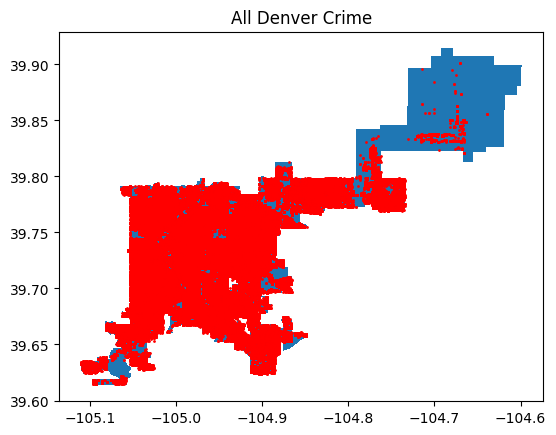

In [43]:
DenCrimePlot=gpd.sjoin(DenTracts,DenCrime,how='left',op='contains')
fig, ax = plt.subplots(1,1)
DenCrimePlot.plot(ax=ax)
DenCrime.plot(ax=ax,color="red",markersize=1)
plt.title("All Denver Crime")

Above map showing that after a spatial join, all remaining crime points are clustered around the Denver metropolitan area, this is all crime in
Denver, now that the data is cleaned, it can be sorted by crime

In [13]:
DenMurderslist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]>=902 and DenCrime.iloc[i,2]<=912):
    line=DenCrime.iloc[i]
    DenMurderslist.append(line)
DenMurderslist[0]

,96757
incident_id,202124464.0
offense_id,202000000000000.0
offense_code,902
offense_code_extension,0
offense_type_id,homicide-family
offense_category_id,murder
first_occurrence_date,1/10/2021 12:00
last_occurrence_date,NaN
reported_date,1/13/2021 15:28
incident_address,1767 S LOGAN ST


Make a list of all murders in the database to be converted to its own Geodataframe, the if statement sorts the crimes by police code, the appropiate corresponding code will help sort all following maps

In [14]:
DenMurdersdf=pd.DataFrame(DenMurderslist)
DenMurders=gpd.GeoDataFrame(DenMurdersdf,geometry=gpd.points_from_xy(DenMurdersdf.geo_lon,DenMurdersdf.geo_lat), crs="EPSG: 4326")
DenMurders.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 411 entries, 96757 to 384850
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             411 non-null    float64 
 1   offense_id              411 non-null    float64 
 2   offense_code            411 non-null    int64   
 3   offense_code_extension  411 non-null    int64   
 4   offense_type_id         411 non-null    object  
 5   offense_category_id     411 non-null    object  
 6   first_occurrence_date   411 non-null    object  
 7   last_occurrence_date    86 non-null     object  
 8   reported_date           411 non-null    object  
 9   incident_address        411 non-null    object  
 10  geo_x                   411 non-null    float64 
 11  geo_y                   411 non-null    float64 
 12  geo_lon                 410 non-null    float64 
 13  geo_lat                 410 non-null    float64 
 14  district_id     

Convert the Denver murders list into Geodataframe

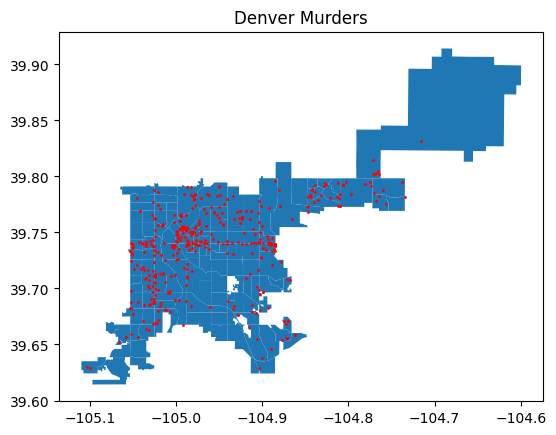

In [15]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
DenMurders.plot(ax=ax,color="red",markersize=1)
plt.title("Denver Murders")
plt.savefig("DenverMurders.png")

Map of all murders in Denver in the last five years. With the bokeh at the end being an exception, going forward, all maps will be made with the same method, sort/extract by police code > convert to geodataframe > produce a map

In [16]:
Robberylist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]>=1201 and DenCrime.iloc[i,2]<=1212):
    line=DenCrime.iloc[i]
    Robberylist.append(line)
Robberylist[0]

,100795
incident_id,2021713991.0
offense_id,2020000000000000.0
offense_code,1202
offense_code_extension,0
offense_type_id,robbery-business
offense_category_id,robbery
first_occurrence_date,12/21/2021 13:52
last_occurrence_date,NaN
reported_date,12/21/2021 16:52
incident_address,1550 S COLORADO BLVD


List of all counts of robbery (not burglarly or larceny) in Denver

In [17]:
Robberydf=pd.DataFrame(Robberylist)
DenRobbery=gpd.GeoDataFrame(Robberydf,geometry=gpd.points_from_xy(Robberydf.geo_lon,Robberydf.geo_lat), crs="EPSG: 4326")
DenRobbery.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6970 entries, 100795 to 386444
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             6970 non-null   float64 
 1   offense_id              6970 non-null   float64 
 2   offense_code            6970 non-null   int64   
 3   offense_code_extension  6970 non-null   int64   
 4   offense_type_id         6970 non-null   object  
 5   offense_category_id     6970 non-null   object  
 6   first_occurrence_date   6970 non-null   object  
 7   last_occurrence_date    1620 non-null   object  
 8   reported_date           6970 non-null   object  
 9   incident_address        6970 non-null   object  
 10  geo_x                   6970 non-null   float64 
 11  geo_y                   6970 non-null   float64 
 12  geo_lon                 6963 non-null   float64 
 13  geo_lat                 6963 non-null   float64 
 14  district_id   

Geodataframe of all robberies in Denver

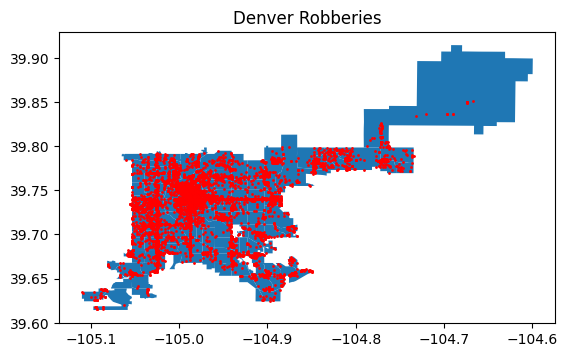

In [18]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
DenRobbery.plot(ax=ax,color="red",markersize=1,aspect=1)
plt.title("Denver Robberies")
plt.savefig("DenverRobbery.png")

Map of all robberies in Denver

In [19]:
Pursetheftlist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]==1210):
    line=DenCrime.iloc[i]
    Pursetheftlist.append(line)
Pursetheftlist[0]

,105451
incident_id,2018732905.0
offense_id,2020000000000000.0
offense_code,1210
offense_code_extension,0
offense_type_id,robbery-purse-snatch-w-force
offense_category_id,robbery
first_occurrence_date,10/26/2018 13:39
last_occurrence_date,NaN
reported_date,10/26/2018 13:40
incident_address,7201 E 36TH AVE


List of purse thefts

In [20]:
Pursetheftdf=pd.DataFrame(Pursetheftlist)
DenPursetheft=gpd.GeoDataFrame(Pursetheftdf,geometry=gpd.points_from_xy(Pursetheftdf.geo_lon,Pursetheftdf.geo_lat), crs="EPSG: 4326")
DenPursetheft.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 229 entries, 105451 to 385112
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             229 non-null    float64 
 1   offense_id              229 non-null    float64 
 2   offense_code            229 non-null    int64   
 3   offense_code_extension  229 non-null    int64   
 4   offense_type_id         229 non-null    object  
 5   offense_category_id     229 non-null    object  
 6   first_occurrence_date   229 non-null    object  
 7   last_occurrence_date    52 non-null     object  
 8   reported_date           229 non-null    object  
 9   incident_address        229 non-null    object  
 10  geo_x                   229 non-null    float64 
 11  geo_y                   229 non-null    float64 
 12  geo_lon                 229 non-null    float64 
 13  geo_lat                 229 non-null    float64 
 14  district_id    

Geodataframe of purse thefts

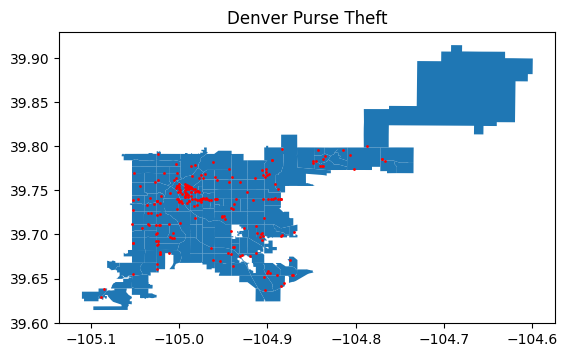

In [21]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
DenPursetheft.plot(ax=ax,color="red",markersize=1,aspect=1)
plt.title("Denver Purse Theft")
plt.savefig("DenverPursetheft.png")

Map of purse thefts

In [22]:
Pickpocketinglist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]==2301):
    line=DenCrime.iloc[i]
    Pickpocketinglist.append(line)
Pickpocketinglist[0]

,163418
incident_id,2021153862.0
offense_id,2020000000000000.0
offense_code,2301
offense_code_extension,0
offense_type_id,theft-pick-pocket
offense_category_id,larceny
first_occurrence_date,3/17/2021 13:11
last_occurrence_date,NaN
reported_date,3/17/2021 13:53
incident_address,6470 E HAMPDEN AVE


List of pickpocketing

In [23]:
Pickpocketingdf=pd.DataFrame(Pickpocketinglist)
Pickpocketing=gpd.GeoDataFrame(Pickpocketingdf,geometry=gpd.points_from_xy(Pickpocketingdf.geo_lon,Pickpocketingdf.geo_lat), crs="EPSG: 4326")
Pickpocketing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 149 entries, 163418 to 386496
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             149 non-null    float64 
 1   offense_id              149 non-null    float64 
 2   offense_code            149 non-null    int64   
 3   offense_code_extension  149 non-null    int64   
 4   offense_type_id         149 non-null    object  
 5   offense_category_id     149 non-null    object  
 6   first_occurrence_date   149 non-null    object  
 7   last_occurrence_date    56 non-null     object  
 8   reported_date           149 non-null    object  
 9   incident_address        149 non-null    object  
 10  geo_x                   149 non-null    float64 
 11  geo_y                   149 non-null    float64 
 12  geo_lon                 149 non-null    float64 
 13  geo_lat                 149 non-null    float64 
 14  district_id    

Geodataframe of pickpocketing

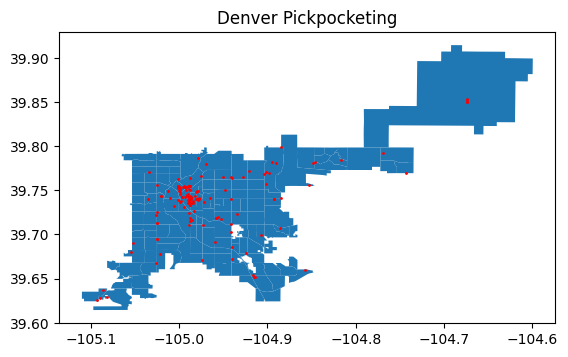

In [24]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
Pickpocketing.plot(ax=ax,color="red",markersize=1,aspect=1)
plt.title("Denver Pickpocketing")
plt.savefig("DenverPickpocketing.png")

Map of pickpocketing

In [25]:
HeroinPossessionlist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]==3512):
    line=DenCrime.iloc[i]
    HeroinPossessionlist.append(line)
HeroinPossessionlist[0]

,34866
incident_id,2019429162.0
offense_id,2020000000000000.0
offense_code,3512
offense_code_extension,0
offense_type_id,drug-heroin-possess
offense_category_id,drug-alcohol
first_occurrence_date,7/9/2019 9:30
last_occurrence_date,NaN
reported_date,7/9/2019 11:36
incident_address,1600 BLK CHESTNUT PL


In [26]:
HeroinPossessiondf=pd.DataFrame(HeroinPossessionlist)
HeroinPossession=gpd.GeoDataFrame(HeroinPossessiondf,geometry=gpd.points_from_xy(HeroinPossessiondf.geo_lon,HeroinPossessiondf.geo_lat), crs="EPSG: 4326")
HeroinPossession.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1325 entries, 34866 to 370983
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             1325 non-null   float64 
 1   offense_id              1325 non-null   float64 
 2   offense_code            1325 non-null   int64   
 3   offense_code_extension  1325 non-null   int64   
 4   offense_type_id         1325 non-null   object  
 5   offense_category_id     1325 non-null   object  
 6   first_occurrence_date   1325 non-null   object  
 7   last_occurrence_date    13 non-null     object  
 8   reported_date           1325 non-null   object  
 9   incident_address        1325 non-null   object  
 10  geo_x                   1325 non-null   float64 
 11  geo_y                   1325 non-null   float64 
 12  geo_lon                 1325 non-null   float64 
 13  geo_lat                 1325 non-null   float64 
 14  district_id    

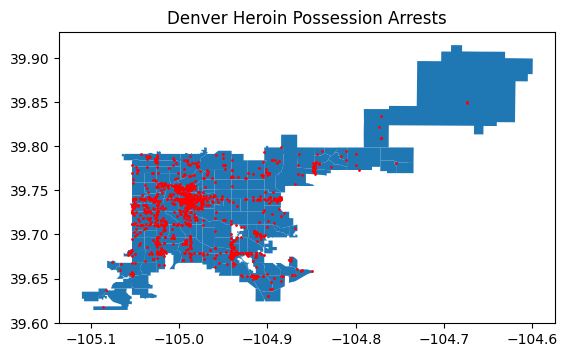

In [27]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
HeroinPossession.plot(ax=ax,color="red",markersize=1,aspect=1)
plt.title("Denver Heroin Possession Arrests")
plt.savefig("DenverHeroinPossession.png")

In [28]:
HeroinSalelist=[]
for i in range(len(DenCrime)):
  if (DenCrime.iloc[i,2]==3510):
    line=DenCrime.iloc[i]
    HeroinSalelist.append(line)
HeroinSalelist[0]

,34500
incident_id,202062046.0
offense_id,202000000000000.0
offense_code,3510
offense_code_extension,0
offense_type_id,drug-heroin-sell
offense_category_id,drug-alcohol
first_occurrence_date,1/28/2020 13:00
last_occurrence_date,NaN
reported_date,1/28/2020 15:05
incident_address,820 N SHERMAN ST


In [29]:
HeroinSaledf=pd.DataFrame(HeroinSalelist)
HeroinSale=gpd.GeoDataFrame(HeroinSaledf,geometry=gpd.points_from_xy(HeroinSaledf.geo_lon,HeroinSaledf.geo_lat), crs="EPSG: 4326")
HeroinSale.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, 34500 to 386395
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   incident_id             380 non-null    float64 
 1   offense_id              380 non-null    float64 
 2   offense_code            380 non-null    int64   
 3   offense_code_extension  380 non-null    int64   
 4   offense_type_id         380 non-null    object  
 5   offense_category_id     380 non-null    object  
 6   first_occurrence_date   380 non-null    object  
 7   last_occurrence_date    7 non-null      object  
 8   reported_date           380 non-null    object  
 9   incident_address        380 non-null    object  
 10  geo_x                   380 non-null    float64 
 11  geo_y                   380 non-null    float64 
 12  geo_lon                 380 non-null    float64 
 13  geo_lat                 380 non-null    float64 
 14  district_id     

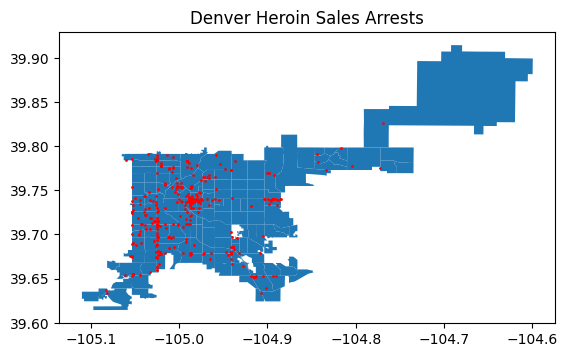

In [30]:
fig, ax = plt.subplots(1,1)
DenTracts.plot(ax=ax)
HeroinSale.plot(ax=ax,color="red",markersize=1,aspect=1)
plt.title("Denver Heroin Sales Arrests")
plt.savefig("DenverHeroinSale.png")

In [36]:
def gpd_bokeh(df):
    """Convert geometries from geopandas to bokeh format"""
    nan = float('nan')
    lons = []
    lats = []
    for i,shape in enumerate(df.geometry.values):
        if shape.geom_type == 'MultiPolygon':
            gx = []
            gy = []
            ng = len(shape.geoms) - 1
            for j,member in enumerate(shape.geoms):
                xy = np.array(list(member.exterior.coords))
                xs = xy[:,0].tolist()
                ys = xy[:,1].tolist()
                gx.extend(xs)
                gy.extend(ys)
                if j < ng:
                    gx.append(nan)
                    gy.append(nan)
            lons.append(gx)
            lats.append(gy)

        else:
            xy = np.array(list(shape.exterior.coords))
            xs = xy[:,0].tolist()
            ys = xy[:,1].tolist()
            lons.append(xs)
            lats.append(ys)

    return lons,lats

Helper function to convert gpd to bokeh

In [38]:
lons, lats = gpd_bokeh(DenTracts)
source = ColumnDataSource(data=dict(
    	x=lons,
    	y=lats,
      Tract = DenTracts['TRACT_NAME'],
      Geoid = DenTracts['GEOID_TRAC']))

ColumnDataSource for Denver bokeh

In [39]:
TOOLS = "pan,wheel_zoom,reset,hover,save"

Tools for bokeh

In [42]:
map = figure(width=800, height=600,title="Denver Tracts", tools=TOOLS,)
map.patches('x', 'y', source=source, line_color="white", line_width=0.1, color='blue')

map.select_one(HoverTool).tooltips = [
    ('Tract', '@Tract'),
    ('Geoid', '@Geoid')
]
output_file("DenverTracts.html")

Bokeh map options, save to html